In [1]:
import pandas as pd # Pandas allows us to read and analyze data and make conclusions based on statistical theories
import numpy as np # this module is used to do some operations with the arrays.
import os # used to handle some files if necessary
import matplotlib.pyplot as plt # using this module we can represent the data in the form of graphs
import seaborn as sns # Used to visualize random distributions.


In [6]:
from google.colab import files
uploaded = files.upload()


Saving IRIS (1).csv to IRIS (1).csv


In [7]:
df = pd.read_csv('/content/IRIS (1).csv')

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# df.describe() - displays statistical measures of the data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.info() # to display info about the data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
# to display number of samples of each class
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [12]:
# While training the model we need to remove all the null values or replace the null values
# with some other values like mean median mode.

In [13]:
# to check the null values
df.isnull().sum() # will display the null values for the corresponding columns.

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

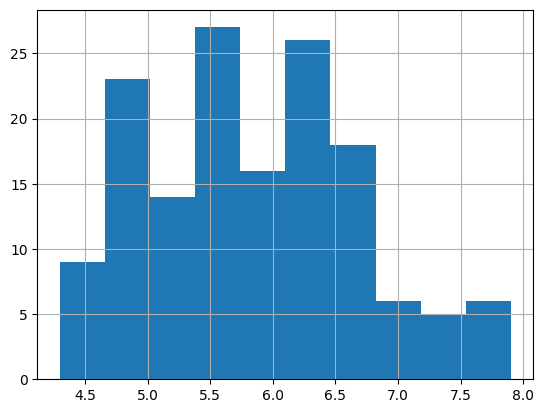

In [14]:
# Histograms
df['sepal_length'].hist()

<Axes: >

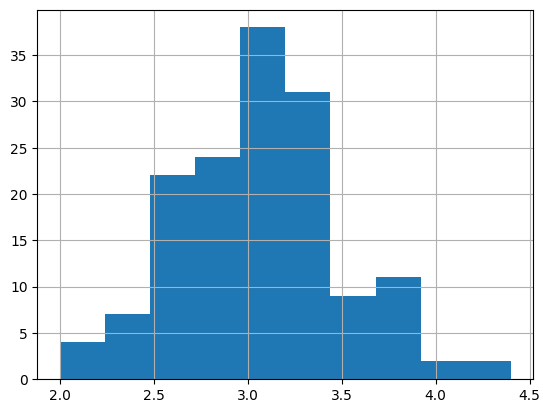

In [15]:
df['sepal_width'].hist()

<Axes: >

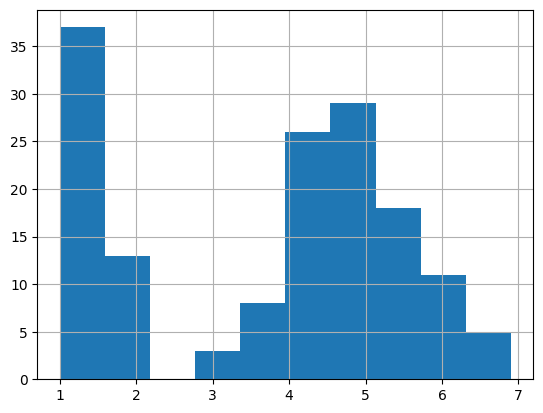

In [16]:
df['petal_length'].hist()

<Axes: >

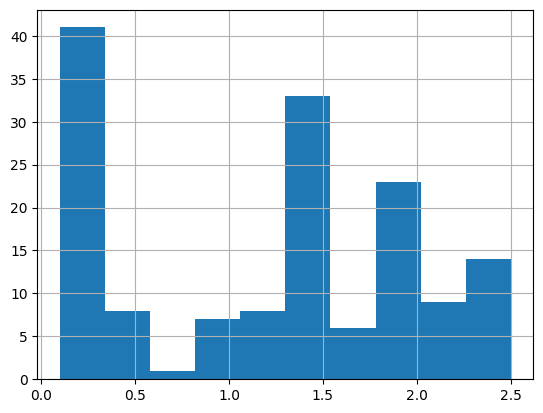

In [17]:
df['petal_width'].hist()

In [18]:
# Scatterplot
colors = ['pink','yellow','blue']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

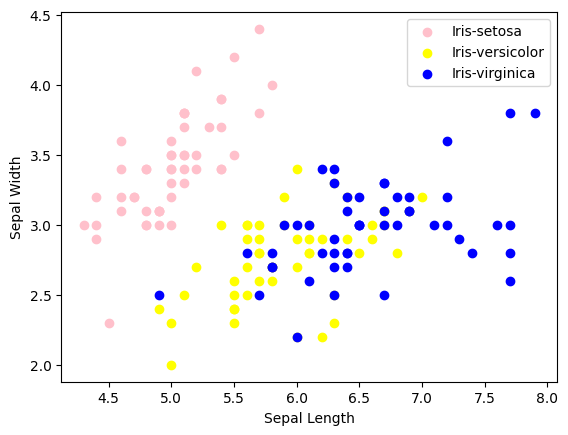

In [19]:
for i in range(3):
  x = df[df['species'] == species[i]] # filter classes from the dataset
  plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label=species[i])

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

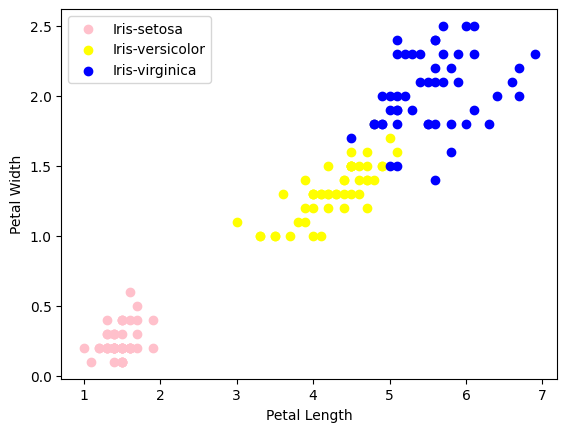

In [20]:
for i in range(3):
  x = df[df['species'] == species[i]] # filter classes from the dataset
  plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label=species[i])

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

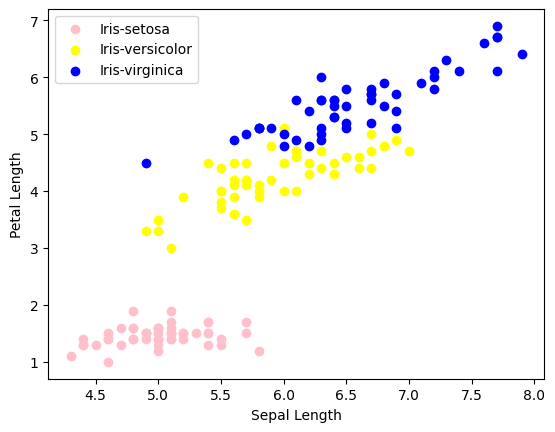

In [21]:
for i in range(3):
  x = df[df['species'] == species[i]] # filter classes from the dataset
  plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label=species[i])

plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

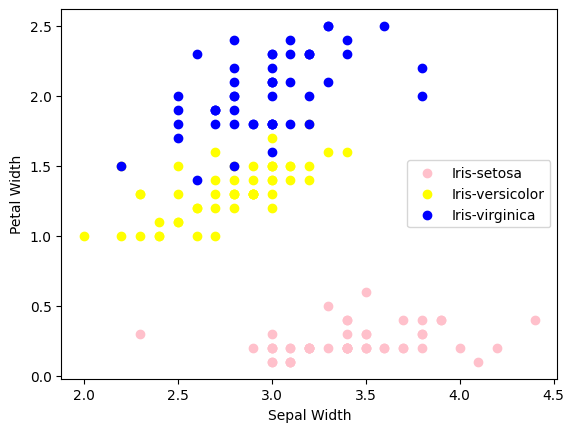

In [22]:
for i in range(3):
  x = df[df['species'] == species[i]] # filter classes from the dataset
  plt.scatter(x['sepal_width'], x['petal_width'], c = colors[i], label=species[i])

plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

Correlation Matrix :

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables.

A correlation matrix is used to summarize data, as an input into a more advanced analysis.

The value is in the range of -1 to 1. If two variable have high correlation, we can neglect one variable from those two.

In [23]:
# creating correlation matrix - correlation matrix is used to understand the importance between two variables
df.corr()

<ipython-input-23-59df2d59c36b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<ipython-input-24-2d8b08752043>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

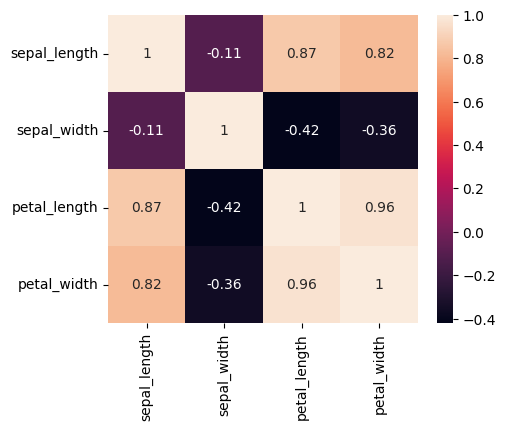

In [24]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4)) # to set the size of the graphs
sns.heatmap(corr, annot=True, ax=ax)

Label Encoder :

Label encoding is a technique used in machine learning and data analysis to convert categorical variables into numerical format

In [25]:
# importing module for label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Model Training

In [27]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['species'])
Y = df['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30) #30% is allocated for testing purpose

In [28]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [29]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [30]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  91.11111111111111


In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
# Create a Gaussian Naive Bayes model
model = GaussianNB()

# Fit the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
predictions = model.predict(x_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9333333333333333
